In [17]:
'''
Author : maysa macedo
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline


In [18]:
'''Auxiliar funtions'''
def removing_nan(df, columns_name):
    '''
    INPUT:
    df - the pandas dataframe you want to clean
    columns_name - list of columns for remove nan values
    OUTPUT:
    df - cleaned pandas dataframe 
    '''
    for col in columns_name:
        df = df.dropna(subset=[col], how='any')
    return df

def total_count(df, col1, col2, look_for,granularity=1.0):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    granularity - optional - numeric interval for possible real numbers at df
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            # if it is a real value, than search for an interval
            if np.isreal(val):
                if df[col1][idx]> val-granularity and  df[col1][idx]<= val:
                    new_df[str(val)] += int(df[col2][idx])
            else:
                if val in df[col1][idx]:
                    new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [19]:
'''
    Business Understanding
    Are the entities hosts properly depicted by the attributes from Airbnb? How to engaged hosts in the same way from different parts of the world? 
'''

# reading airbnb data from the cities Rio de Janeiro and San Diego 
df_rio = pd.read_csv('../../../imagem/airbnb/rio_de_janeiro/listings.csv.gz', compression='gzip',)
df_diego = pd.read_csv('../../../imagem/airbnb/san_diego/listings.csv.gz', compression='gzip')


In [20]:
'''

    Data Understanding

'''
print("quantity of records;", "Rio de Janeiro:",df_rio.shape,'--' ,"San Diego:", df_diego.shape)
df_diego.columns


quantity of records; Rio de Janeiro: (30476, 75) -- San Diego: (12871, 75)


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [21]:
# explore missing values

print("Number of columns with 75% missing: Rio de Janeiro:",np.sum(np.sum(df_rio.isnull()) > .75),"-- San Diego:",np.sum(np.sum(df_diego.isnull()) > .75))
print("Number of records missing for host_response_time column: Rio de Janeiro:",np.sum(df_rio['host_response_time'].isnull()!=0),"-- San Diego:",np.sum(df_diego['host_response_time'].isnull()!=0))
print("Number of records missing for host_response_time column: Rio de Janeiro:",np.sum(df_rio['host_response_time'].isnull()!=0),"-- San Diego:",np.sum(df_diego['host_response_time'].isnull()!=0))

print("Number of records missing for host_about column: Rio de Janeiro:",np.sum(df_rio['host_about'].isnull()!=0),"-- San Diego:",np.sum(df_diego['host_about'].isnull()!=0))

print("Number of records missing for host_response_rate column: Rio de Janeiro:",np.sum(df_rio['host_response_rate'].isnull()!=0),"-- San Diego:",np.sum(df_diego['host_response_rate'].isnull()!=0))

print("Number of records missing for host_acceptance_rate column: Rio de Janeiro:",np.sum(df_rio['host_acceptance_rate'].isnull()!=0),"-- San Diego:",np.sum(df_diego['host_acceptance_rate'].isnull()!=0))

print("Number of records missing for host_is_superhost column: Rio de Janeiro:",np.sum(df_rio['host_is_superhost'].isnull()!=0),"-- San Diego:",np.sum(df_diego['host_is_superhost'].isnull()!=0))

print("Number of records missing for review_scores_communication column: Rio de Janeiro:",np.sum(df_rio['review_scores_communication'].isnull()!=0),"-- San Diego:",np.sum(df_diego['review_scores_communication'].isnull()!=0))




Number of columns with 75% missing: Rio de Janeiro: 37 -- San Diego: 42
Number of records missing for host_response_time column: Rio de Janeiro: 4695 -- San Diego: 1431
Number of records missing for host_response_time column: Rio de Janeiro: 4695 -- San Diego: 1431
Number of records missing for host_about column: Rio de Janeiro: 15825 -- San Diego: 4542
Number of records missing for host_response_rate column: Rio de Janeiro: 4695 -- San Diego: 1431
Number of records missing for host_acceptance_rate column: Rio de Janeiro: 3733 -- San Diego: 919
Number of records missing for host_is_superhost column: Rio de Janeiro: 7 -- San Diego: 7
Number of records missing for review_scores_communication column: Rio de Janeiro: 7661 -- San Diego: 1932


In [22]:
'''
    Prepare Data
    
'''

# defining the columns that need to clean
columns_name = [  'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost','review_scores_communication']


In [23]:
#removing nan values
df_diego_small = removing_nan(df_diego, columns_name)
df_rio_small = removing_nan(df_rio, columns_name)

In [24]:
print("quantity of records after the missing values removal;", "Rio de Janeiro:",df_rio_small.shape,'--' ,"San Diego:", df_diego_small.shape)

df_rio_small.head()

quantity of records after the missing values removal; Rio de Janeiro: (10516, 75) -- San Diego: (6714, 75)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20230328184454,2023-03-29,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Please note that elevated rates applies for Ne...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,...,4.90,4.77,4.65,NaN,f,1,1,0,0,1.86
1,200568,https://www.airbnb.com/rooms/200568,20230328184454,2023-03-29,city scrape,30m of Ipa Beach e fins de semana special price !,"ATENÇÃO, a eletricidade e gás são pagas pelo h...","Praia, restaurantes, boates, centros culturais...",https://a0.muscache.com/pictures/0586b774-3641...,980805,...,4.97,4.95,4.73,NaN,f,6,4,2,0,1.45
2,202778,https://www.airbnb.com/rooms/202778,20230328184454,2023-03-29,city scrape,Best Studio in Rio - Copacabana,If you looking to staying in a beautiful moder...,Besides Copacabana been the most famous touris...,https://a0.muscache.com/pictures/2015102/18eea...,529105,...,4.94,4.85,4.68,NaN,f,3,3,0,0,1.58
3,24480,https://www.airbnb.com/rooms/24480,20230328184454,2023-03-29,city scrape,"Nice and cozy near Ipanema Beach, w/ home office","My studio is located in the best of Ipanema, t...","The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/miso/Hosting-...,99249,...,4.90,4.97,4.56,NaN,f,3,3,0,0,0.56
5,342874,https://www.airbnb.com/rooms/342874,20230328184454,2023-03-29,city scrape,Comfortable in Copacabana beach,<b>The space</b><br />Excellent fit completely...,"Several services around 24hrs, banks, restaura...",https://a0.muscache.com/pictures/25749494/d65a...,829630,...,4.95,4.93,4.86,NaN,f,3,3,0,0,1.19


In [25]:
'''
    Data Modeling
    Results

'''

#first analysis - How long Rio hosts return a response?
response_time_diego=  df_diego_small['host_response_time'].value_counts().reset_index() 
response_time_rio=  df_rio_small['host_response_time'].value_counts().reset_index() 
response_time_diego_values =response_time_diego.values[:][:,1]/df_diego_small.shape[0]
response_time_rio_values =response_time_rio.values[:][:,1]/df_rio_small.shape[0]

In [26]:
#counting the several time responses
possible_vals =["within an hour",	"within a few hours",	"within a day",	"a few days or more"]
study_rio = df_rio_small['host_response_time'].value_counts().reset_index()
study_df_rio = total_count(study_rio, 'host_response_time', 'count', possible_vals)

study_diego = df_diego_small['host_response_time'].value_counts().reset_index()
study_df_diego = total_count(study_diego, 'host_response_time', 'count', possible_vals)

study_df_rio.set_index('host_response_time', inplace=True)
study_df_diego.set_index('host_response_time', inplace=True)



In [27]:
#setting up the city
city_diego  = ['San Diego'] * study_df_diego.shape[0]
city_rio    = ['Rio de Janeiro'] * study_df_rio.shape[0]
study_df_diego['city'] = city_diego
study_df_rio['city'] = city_rio

In [28]:
#percentage
study_df_diego['count'] = study_df_diego['count']/study_df_diego['count'].sum()
study_df_rio['count'] = study_df_rio['count']/study_df_rio['count'].sum()

In [29]:
df_first_analysis_study = pd.concat([study_df_diego,study_df_rio])
df_first_analysis_study.rename(columns={'index': 'method'}, inplace=True)
df_first_analysis_study.columns

Index(['count', 'city'], dtype='object')

In [30]:
#creating a new column
df_first_analysis_study['host_response_time'] = df_first_analysis_study.index

In [31]:
df_first_analysis_study

,count,city,host_response_time
host_response_time,,,
within an hour,0.835270,San Diego,within an hour
within a few hours,0.111558,San Diego,within a few hours
within a day,0.045874,San Diego,within a day
a few days or more,0.007298,San Diego,a few days or more
within an hour,0.619532,Rio de Janeiro,within an hour
within a few hours,0.255135,Rio de Janeiro,within a few hours
within a day,0.100228,Rio de Janeiro,within a day
a few days or more,0.025105,Rio de Janeiro,a few days or more


Text(0.5, 1.0, 'Host time response comparison')

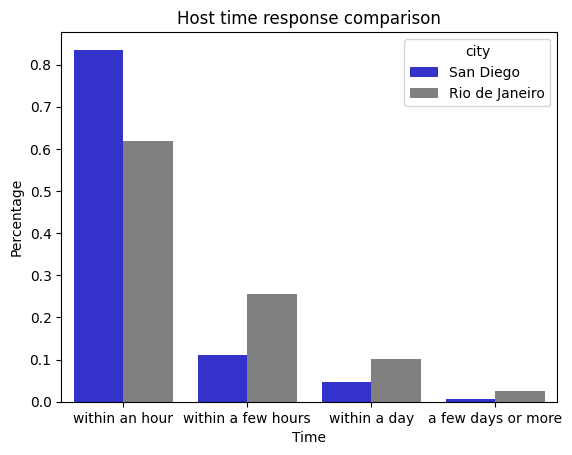

In [32]:
ax = sns.barplot(
    data=df_first_analysis_study,
    x="host_response_time",
    y="count",
    hue="city",
    palette=['blue', 'gray'],
    saturation=0.6,
)
ax.set_ylabel('Percentage')
ax.set_xlabel('Time')
ax.set_title('Host time response comparison')

In [33]:
# second analysis - How Rio hosts are able to be a superhost? 

is_superhost_diego=  np.sum(df_diego_small['host_is_superhost']=='t')/df_diego_small.shape[0]
is_superhost_rio=  np.sum(df_rio_small['host_is_superhost']=='t')/df_rio_small.shape[0]
df_second_analysis_study = pd.DataFrame([[is_superhost_diego,'San Diego','superhost'],[is_superhost_rio,'Rio de Janeiro','superhost']],columns=['percentage','city','analysis'])

In [34]:

df_second_analysis_study.head()

,percentage,city,analysis
0,0.521001,San Diego,superhost
1,0.365348,Rio de Janeiro,superhost


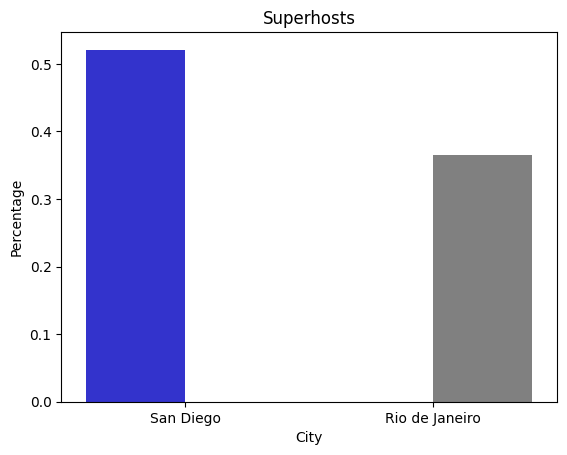

In [35]:
ax = sns.barplot(
    data=df_second_analysis_study,
    x="city",
    y="percentage",
    hue="city",
    palette=['blue', 'gray'],
    saturation=0.6,
)
ax.set_ylabel('Percentage')
ax.set_xlabel('City')
ax.set_title('Superhosts')
ax.legend([],[], frameon=False)

In [36]:
# third analysis - How Rio hosts are accurate in response?
percentage_of_host_response_rio = np.sum(df_rio_small['host_response_rate']=='100%')/df_rio_small.shape[0]
percentage_of_host_response_diego = np.sum(df_diego_small['host_response_rate']=='100%')/df_diego_small.shape[0]
df_third_analysis_study = pd.DataFrame([[percentage_of_host_response_diego,'San Diego','response rate'],[percentage_of_host_response_rio,'Rio de Janeiro','response rate']],columns=['percentage','city','analysis'])
df_third_analysis_study.head()

,percentage,city,analysis
0,0.752160,San Diego,response rate
1,0.694656,Rio de Janeiro,response rate


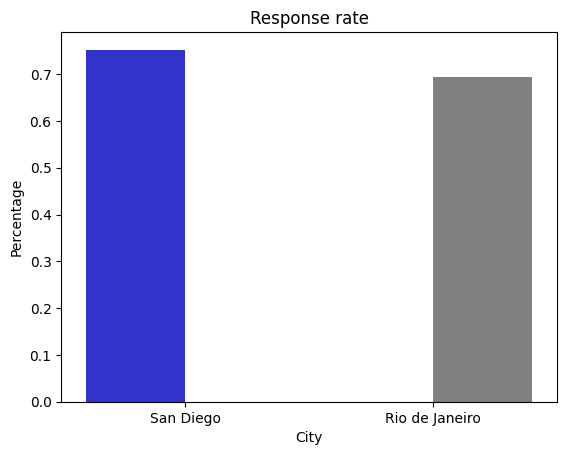

In [37]:
ax = sns.barplot(
    data=df_third_analysis_study,
    x="city",
    y="percentage",
    hue="city",
    palette=['blue', 'gray'],
    saturation=0.6,
)
ax.set_ylabel('Percentage')
ax.set_xlabel('City')
ax.set_title('Response rate')
ax.legend([],[], frameon=False)

In [38]:
print(percentage_of_host_response_rio)
print (percentage_of_host_response_diego)

0.6946557626473945
0.7521596663687816


In [39]:
df_sec_third_analysis_study = pd.concat([df_third_analysis_study,df_second_analysis_study])
print(df_sec_third_analysis_study.columns)
df_sec_third_analysis_study.head()

Index(['percentage', 'city', 'analysis'], dtype='object')


,percentage,city,analysis
0,0.752160,San Diego,response rate
1,0.694656,Rio de Janeiro,response rate
0,0.521001,San Diego,superhost
1,0.365348,Rio de Janeiro,superhost


Text(0.5, 1.0, 'Response rate and superhost presence')

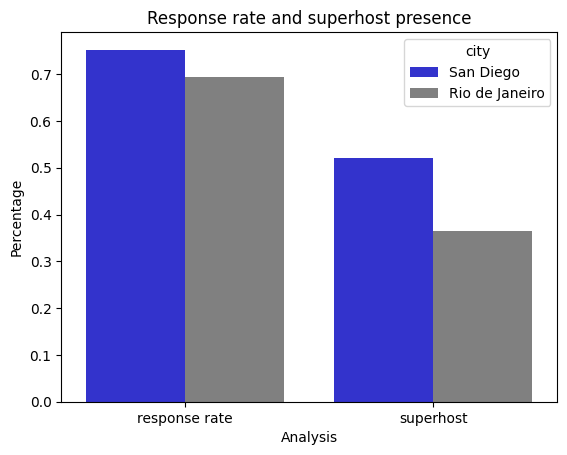

In [40]:
ax = sns.barplot(
    data=df_sec_third_analysis_study,
    x="analysis",
    y="percentage",
    hue="city",
    palette=['blue', 'gray'],
    saturation=0.6,
)
ax.set_ylabel('Percentage')
ax.set_xlabel('Analysis')
ax.set_title('Response rate and superhost presence')


In [41]:
#forth analysis Does the reviewers think the same about the hosts?
#percentage of hosts with score 5.0 ( the maximum)
mean_review_comm_rio = np.sum(df_rio_small['review_scores_communication']==5.00)/df_rio_small.shape[0]
mean_review_comm_diego = np.sum(df_diego_small['review_scores_communication']==5.00)/df_diego_small.shape[0]
print(mean_review_comm_rio)
print(mean_review_comm_diego)


0.4794598706732598
0.30294906166219837


Text(0.5, 1.0, 'Review score communication comparison')

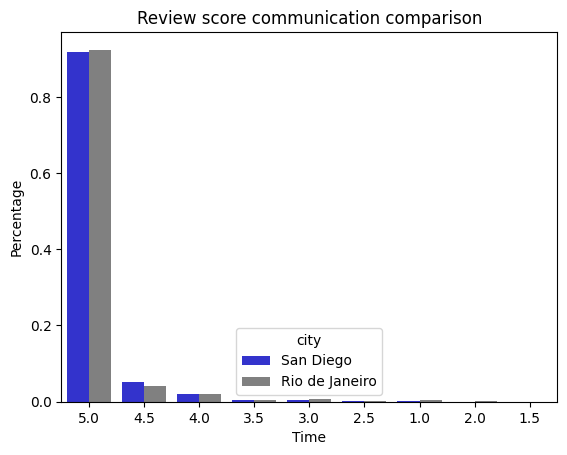

In [42]:
# score from 0.0 to 5.0  with 0.5 of interval
possible_vals =[5.0, 4.5,	4.0, 3.5,	3.0,  2.5,	2.0, 2.5,  1.0, 1.5, 0.0]
study_rio = df_rio_small['review_scores_communication'].value_counts().reset_index()
study_df_rio = total_count(study_rio, 'review_scores_communication', 'count', possible_vals,0.5)

study_diego = df_diego_small['review_scores_communication'].value_counts().reset_index()
study_df_diego = total_count(study_diego, 'review_scores_communication', 'count', possible_vals,0.5)

study_df_rio.set_index('review_scores_communication', inplace=True)
study_df_diego.set_index('review_scores_communication', inplace=True)

city_diego  = ['San Diego'] * study_df_diego.shape[0]
city_rio    = ['Rio de Janeiro'] * study_df_rio.shape[0]
study_df_diego['city'] = city_diego
study_df_rio['city'] = city_rio

study_df_diego['count'] = study_df_diego['count']/study_df_diego['count'].sum()
study_df_rio['count'] = study_df_rio['count']/study_df_rio['count'].sum()

df_forth_analysis_study = pd.concat([study_df_diego,study_df_rio])
df_forth_analysis_study.rename(columns={'index': 'method'}, inplace=True)

df_forth_analysis_study['review_scores_communication'] = df_forth_analysis_study.index

ax = sns.barplot(
    data=df_forth_analysis_study,
    x="review_scores_communication",
    y="count",
    hue="city",
    palette=['blue', 'gray'],
    saturation=0.6,
)
ax.set_ylabel('Percentage')
ax.set_xlabel('Time')
ax.set_title('Review score communication comparison')

Text(0.5, 1.0, 'Review score communication comparison')

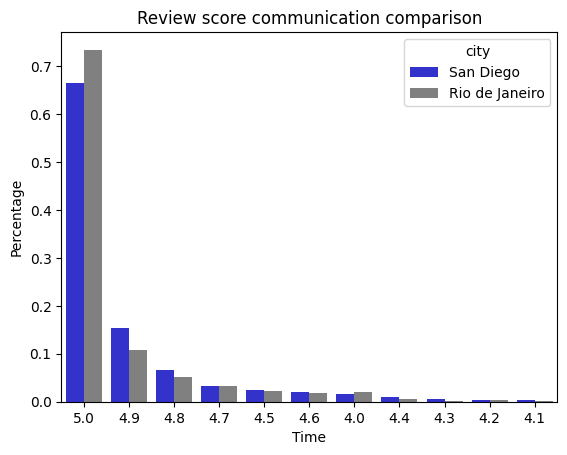

In [43]:
# more careful analysis between 4.0 and 5.0 score
possible_vals =[4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]
study_rio = df_rio_small['review_scores_communication'].value_counts().reset_index()
study_df_rio = total_count(study_rio, 'review_scores_communication', 'count', possible_vals,0.05)

study_diego = df_diego_small['review_scores_communication'].value_counts().reset_index()
study_df_diego = total_count(study_diego, 'review_scores_communication', 'count', possible_vals,0.05)

study_df_rio.set_index('review_scores_communication', inplace=True)
study_df_diego.set_index('review_scores_communication', inplace=True)

city_diego  = ['San Diego'] * study_df_diego.shape[0]
city_rio    = ['Rio de Janeiro'] * study_df_rio.shape[0]
study_df_diego['city'] = city_diego
study_df_rio['city'] = city_rio

study_df_diego['count'] = study_df_diego['count']/study_df_diego['count'].sum()
study_df_rio['count'] = study_df_rio['count']/study_df_rio['count'].sum()

df_forth_analysis_study = pd.concat([study_df_diego,study_df_rio])
df_forth_analysis_study.rename(columns={'index': 'method'}, inplace=True)

df_forth_analysis_study['review_scores_communication'] = df_forth_analysis_study.index

ax = sns.barplot(
    data=df_forth_analysis_study,
    x="review_scores_communication",
    y="count",
    hue="city",
    palette=['blue', 'gray'],
    saturation=0.6,
)
ax.set_ylabel('Percentage')
ax.set_xlabel('Time')
ax.set_title('Review score communication comparison')